In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Вчитување на податочното множество

In [4]:
dataset_original = pd.read_excel('Data_Cortex_Nuclear.xls').drop('MouseID', axis=1).drop('Behavior', axis=1).drop('Treatment', axis=1).drop('Genotype', axis=1)
dataset = dataset_original.copy().drop('class', axis=1)
dataset.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


## Проверка на NaN вредности

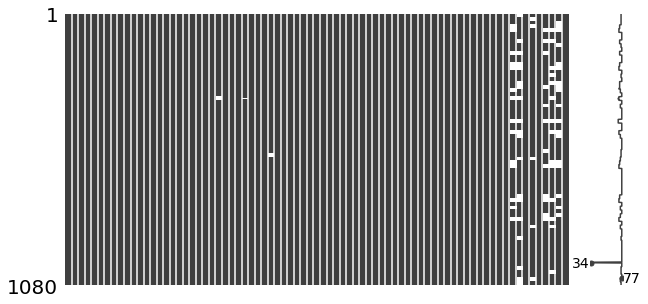

In [5]:
missingno.matrix(dataset, figsize=(10, 5))

## Пополнување на NaN (вредности што недостигаат) вредостите со средната вредност од таа карактеристика

In [6]:
for column in list(dataset.columns):
    dataset[column] = dataset[column].fillna(dataset[column].mean())

In [7]:
dataset

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.134762,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.134762,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.134762,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.134762,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


Сакаме податоците бидат нормализирани бидејќи distance computation стриктно за K-means дава поеднаква тежина за секоја димензија па податоците не треба да ја надминуваат релативната близина на набљудуваните податоци од кластерите. [Data-normalization part](https://www.edupristine.com/blog/k-means-algorithm)

In [8]:
from sklearn import preprocessing

names = dataset.columns
dataset = preprocessing.normalize(dataset, axis=0)
dataset = pd.DataFrame(dataset, columns=names)
dataset.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.031072,0.034125,0.040542,0.036887,0.046085,0.028115,0.029391,0.019180,0.032859,0.035454,...,0.025147,0.023310,0.029976,0.026437,0.024775,0.028817,0.019616,0.021481,0.018488,0.037087
1,0.031749,0.031470,0.038807,0.036536,0.043738,0.027191,0.028605,0.018521,0.032116,0.032324,...,0.026685,0.022175,0.029976,0.026509,0.023856,0.029794,0.019136,0.022021,0.018911,0.038591
2,0.031414,0.033351,0.039423,0.035196,0.043253,0.026853,0.029086,0.018449,0.032580,0.031614,...,0.025790,0.022522,0.029976,0.026934,0.024291,0.029403,0.019120,0.021737,0.018379,0.042638
3,0.027276,0.028183,0.033799,0.032311,0.038310,0.028636,0.029208,0.017391,0.029291,0.032298,...,0.025581,0.025235,0.029976,0.025661,0.025445,0.026428,0.022286,0.024033,0.021187,0.037639
4,0.026834,0.028199,0.033815,0.030986,0.036303,0.027379,0.028739,0.017243,0.027190,0.030459,...,0.027378,0.024697,0.029976,0.026059,0.025315,0.029293,0.020248,0.022871,0.021400,0.040719


Според [1](https://medium.com/@evgen.ryzhkov/5-stages-of-data-preprocessing-for-k-means-clustering-b755426f9932) има 5 чекори за preprocessing data за кластерирање. Помеѓу нив спаѓаат отстранување на екстремни вредности и шум, отстранување на зависни променливи односно карактеристики што се многу корелирани и намалување на димензиите со PCA поради самиот curse of dimensionality.

In [9]:
#Remove the outliers and noisy data

z_scores = np.abs(stats.zscore(dataset, nan_policy = 'omit'))
outliers_threshold = 3
mask = (z_scores < outliers_threshold).all(axis=1)
dataset_cleaned = dataset[mask]

In [10]:
corr = dataset_cleaned.corr().abs()

In [11]:
#Remove highly correlated features

correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] >= 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)

print(len(correlated_features), correlated_features)

21 {'pNR1_N', 'pBRAF_N', 'NR2A_N', 'CREB_N', 'MEK_N', 'ELK_N', 'NR2B_N', 'ITSN1_N', 'Bcatenin_N', 'pPKCAB_N', 'BRAF_N', 'pNR2B_N', 'pERK_N', 'pMEK_N', 'pJNK_N', 'ERK_N', 'RSK_N', 'pS6_N', 'TIAM1_N', 'TRKA_N', 'RAPTOR_N'}


In [12]:
dataset_cleaned.drop(labels = correlated_features, axis = 1, inplace = True)

In [13]:
dataset_cleaned

,DYRK1A_N,BDNF_N,NR1_N,pAKT_N,pCAMKII_N,pCREB_N,pELK_N,PKCA_N,pNR2A_N,pRSK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.031072,0.040542,0.036887,0.028115,0.019180,0.032859,0.035454,0.038033,0.024548,0.030006,...,0.029630,0.025147,0.023310,0.029976,0.024775,0.028817,0.019616,0.021481,0.018488,0.037087
1,0.031749,0.038807,0.036536,0.027191,0.018521,0.032116,0.032324,0.036455,0.023814,0.030252,...,0.030261,0.026685,0.022175,0.029976,0.023856,0.029794,0.019136,0.022021,0.018911,0.038591
2,0.031414,0.039423,0.035196,0.026853,0.018449,0.032580,0.031614,0.035984,0.024418,0.031778,...,0.030170,0.025790,0.022522,0.029976,0.024291,0.029403,0.019120,0.021737,0.018379,0.042638
3,0.027276,0.033799,0.032311,0.028636,0.017391,0.029291,0.032298,0.035614,0.021088,0.032457,...,0.029691,0.025581,0.025235,0.029976,0.025445,0.026428,0.022286,0.024033,0.021187,0.037639
4,0.026834,0.033815,0.030986,0.027379,0.017243,0.027190,0.030459,0.034331,0.020589,0.032848,...,0.031309,0.027378,0.024697,0.029976,0.025315,0.029293,0.020248,0.022871,0.021400,0.040719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0.020571,0.029819,0.030347,0.030316,0.023877,0.030487,0.022650,0.025533,0.023769,0.029087,...,0.030686,0.033470,0.032092,0.029976,0.025228,0.026679,0.047478,0.027777,0.037720,0.028705
1073,0.017333,0.028240,0.030006,0.031608,0.023804,0.031379,0.023112,0.026738,0.023237,0.028929,...,0.031068,0.033347,0.031759,0.029976,0.024097,0.027565,0.047369,0.029770,0.034183,0.028714
1074,0.014250,0.023979,0.024478,0.026946,0.017647,0.026514,0.019231,0.021231,0.019218,0.027770,...,0.034793,0.039115,0.039510,0.029976,0.040156,0.026311,0.050299,0.032576,0.044437,0.031434
1075,0.015724,0.024019,0.027401,0.027203,0.020069,0.029335,0.021422,0.023603,0.020695,0.028727,...,0.034311,0.036691,0.036201,0.029976,0.041925,0.025240,0.054478,0.033359,0.047353,0.030208


In [14]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(dataset_cleaned)

dataset_cleaned_reduced = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10'])
dataset_cleaned_reduced

,pc1,pc2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-0.022859,0.005192,-0.016247,-0.005410,0.003202,0.010601,0.009664,0.009693,-0.000869,0.013354
1,-0.025050,0.006067,-0.011969,-0.003084,-0.000479,0.008363,0.009472,0.008936,-0.000449,0.012493
2,-0.025447,0.008444,-0.011376,-0.001493,-0.002145,0.006747,0.010827,0.007672,-0.001393,0.013265
3,-0.019784,0.004175,-0.000867,-0.012954,0.000303,0.009223,0.011157,0.008122,0.000482,0.012313
4,-0.021344,0.005725,0.001829,-0.010525,-0.004167,0.006324,0.011698,0.007832,0.001477,0.010789
...,...,...,...,...,...,...,...,...,...,...
816,0.039477,0.031558,0.022565,0.024793,0.008761,0.010901,0.004300,-0.001279,-0.001524,-0.000275
817,0.039132,0.029852,0.022880,0.024320,0.006271,0.008328,0.004647,0.000976,-0.002209,-0.002532
818,0.033045,0.036614,0.045042,0.024978,0.007483,-0.009911,0.003359,-0.001917,0.000700,-0.003716
819,0.038544,0.034893,0.038340,0.024268,0.011379,-0.005077,0.004648,-0.005438,0.001723,-0.001478


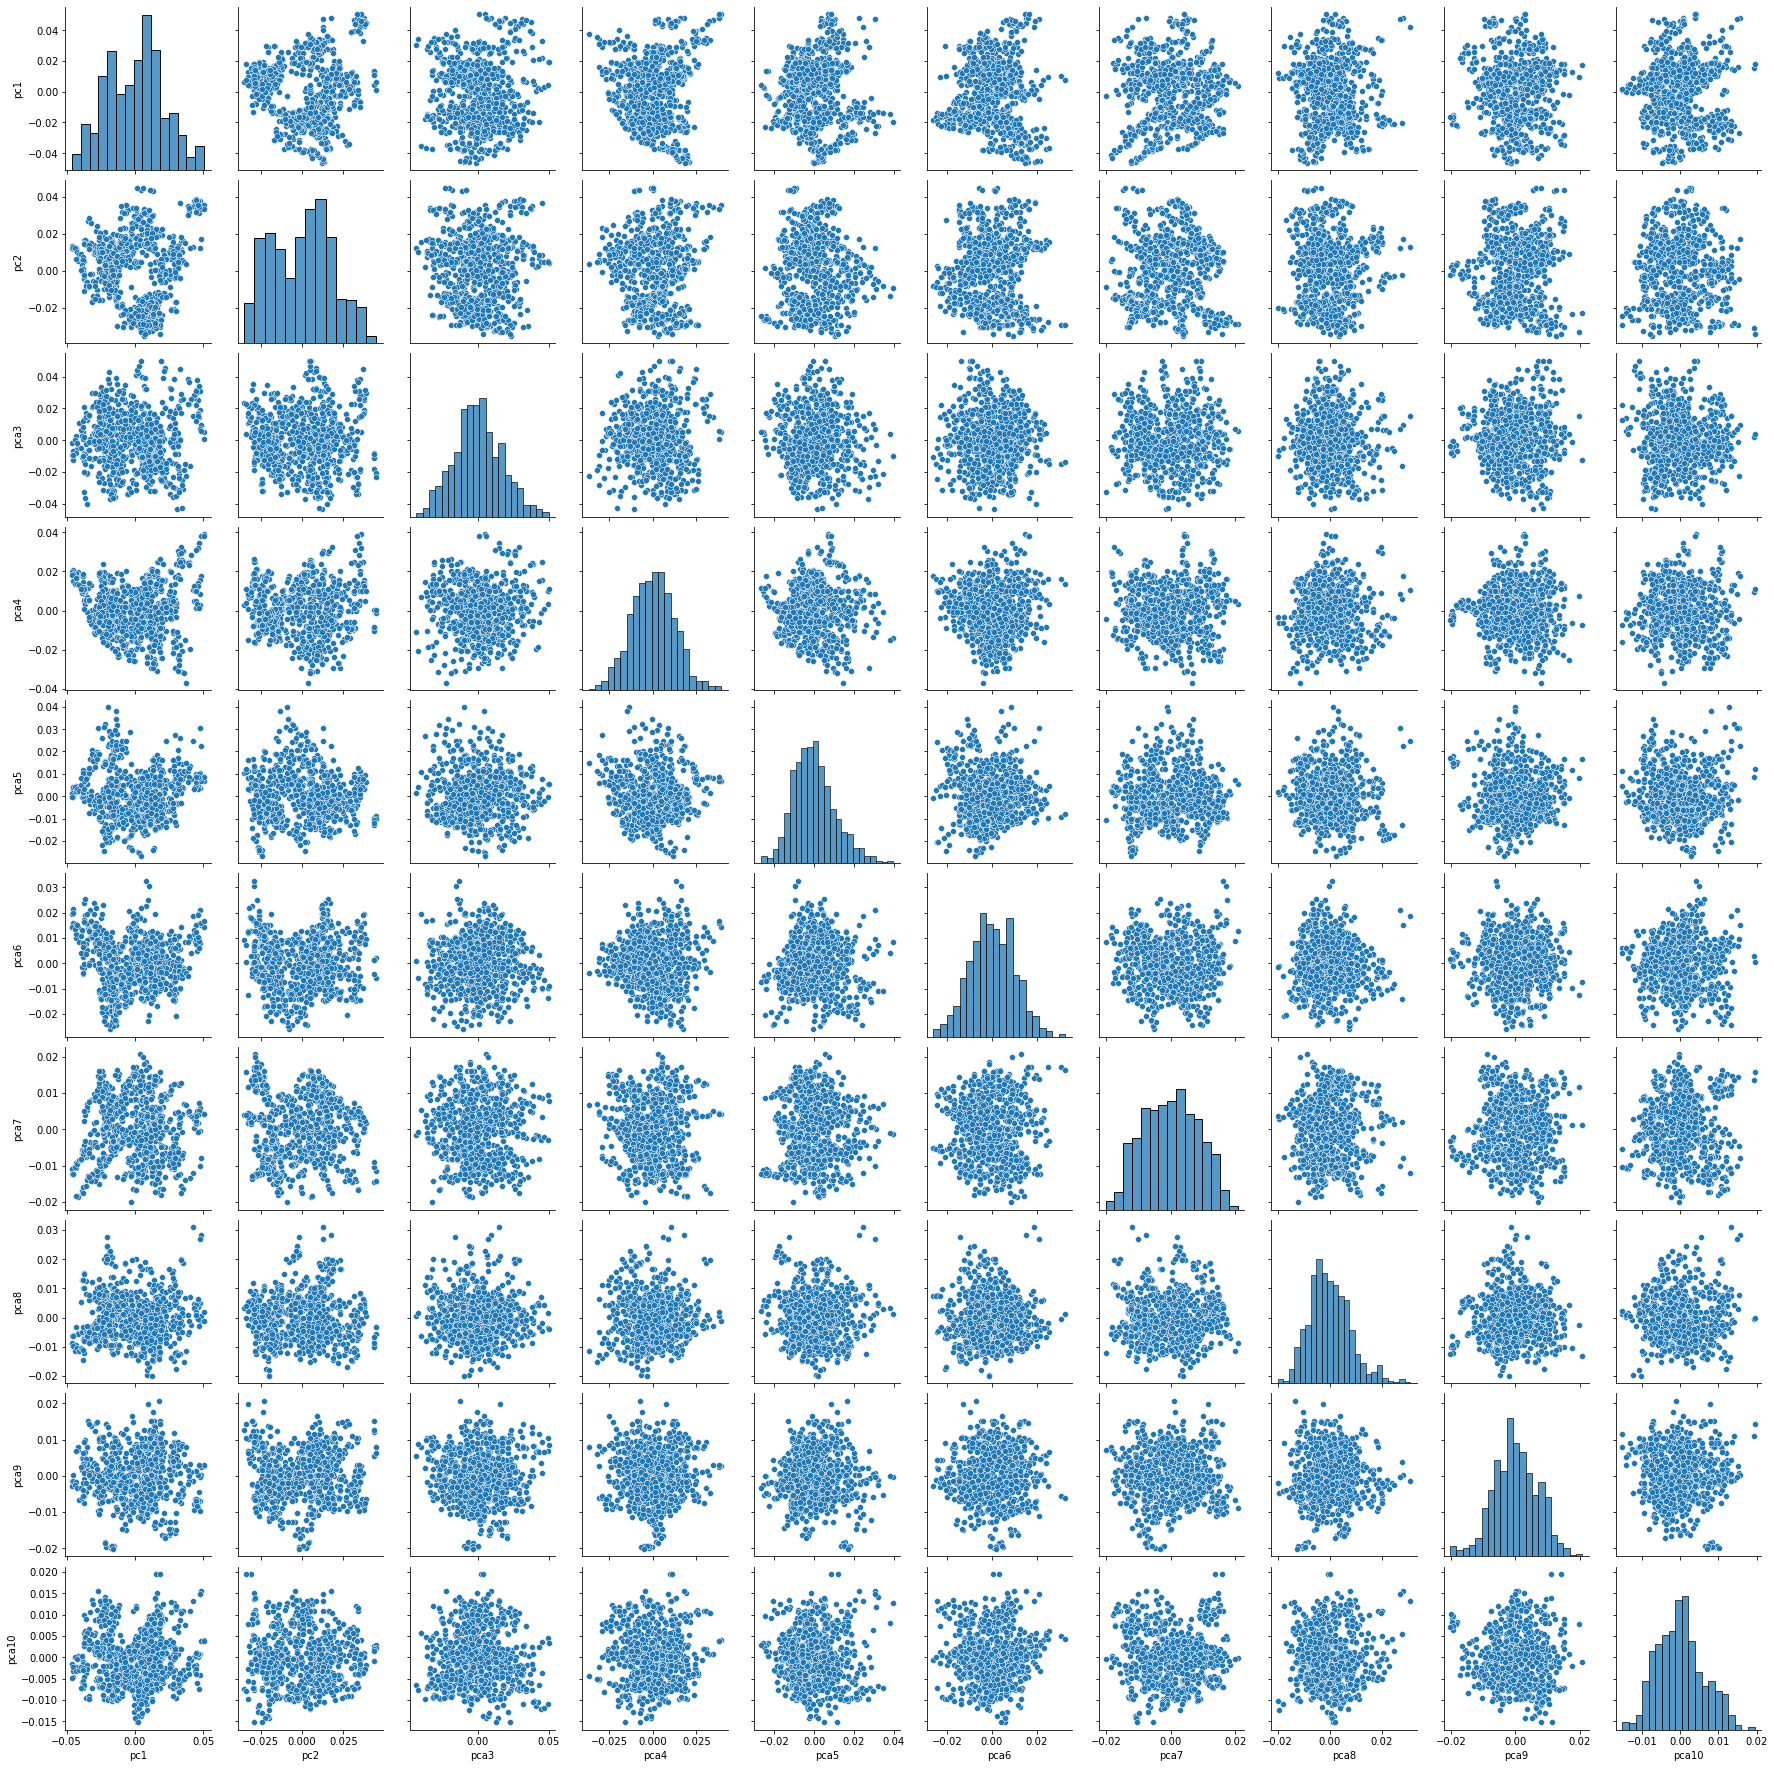

In [15]:
sns.pairplot(dataset_cleaned_reduced)

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_cleaned)

dataset_cleaned_reduced = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
dataset_cleaned_reduced

,pc1,pc2
0,-0.022859,0.005192
1,-0.025050,0.006067
2,-0.025447,0.008444
3,-0.019784,0.004175
4,-0.021344,0.005725
...,...,...
816,0.039477,0.031558
817,0.039132,0.029852
818,0.033045,0.036614
819,0.038544,0.034893


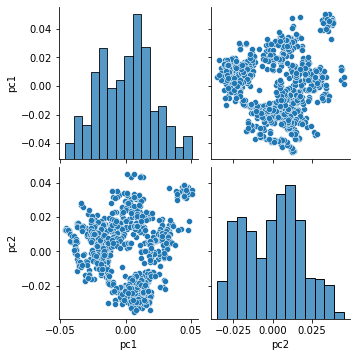

In [17]:
sns.pairplot(dataset_cleaned_reduced)

Овде ќе употребиме методи за наоѓање на вистинското К во K-means алгоритмот односно бројот на кластери. Ќе употребиме Silhouette score и методот на лакт (elbow method).

In [18]:
sil = list()
wcv = {}
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(dataset_cleaned_reduced)
    wcv[k] = kmeans.inertia_ #use for WSS (elbow method)
    labels = kmeans.labels_
    sil.append(silhouette_score(dataset_cleaned_reduced, labels, metric = 'euclidean')) #use for silhouette method

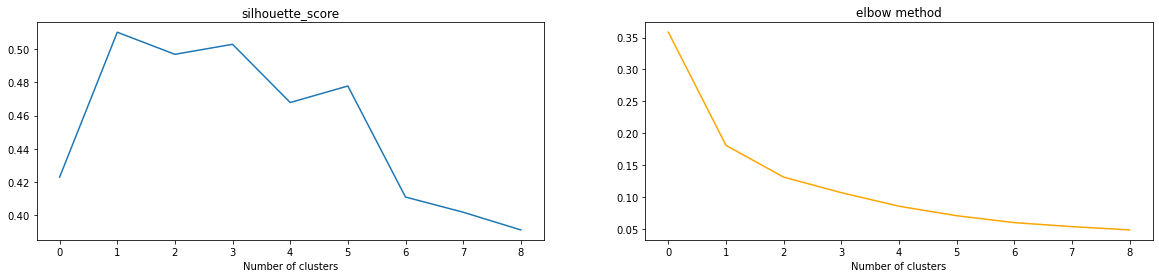

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))

ax1.set_title("silhouette_score")
ax2.set_title("elbow method")

ax1.set_xlabel("Number of clusters")
ax2.set_xlabel("Number of clusters")

ax1.plot(sil)
ax2.plot(list(wcv.values()), color='orange')

Според Silhouette методот, соодветниот број на кластери е најголемата вредност што се добива со овој алгоритам. Според графикот можеме да видеме дека имаме 3 максимуми а согласно анализата на графикот погоре за 2 димензии, бројот на кластери ќе го одбереме да биде 5. Според elbow method нема некој позначаен видлив "лакт" односно лактот е кај 1 а 1 кластер значи дека нашето множество нема кластери па затоа ќе се водиме според Silhouette score.

In [20]:
df = dataset_cleaned_reduced.copy()

In [22]:
df['class'] = dataset_original['class']

In [23]:
classes = list(np.unique(df['class']))
for i, column in enumerate(classes):
    df.loc[df['class'] == column, 'class'] = i

Scatter plot на податоците пред кластерирање со нивните класи

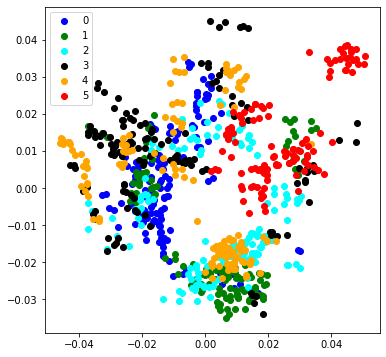

In [24]:
#Original classes scattered

color=['blue','green','cyan', 'black', 'orange', 'red', 'yellow', 'pink']
plt.figure(figsize=(6, 6))
for i in range(len(list(np.unique(df['class'])))):
    plt.scatter(df[df['class'] == i].pc1, df[df['class'] == i].pc2, c=color[i], label=i)
plt.legend()

## K-means

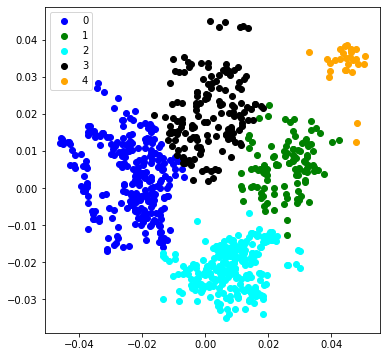

In [25]:
no_clusters = 5
kmeans = KMeans(n_clusters = no_clusters, random_state = 1)
kmeans.fit(dataset_cleaned_reduced)

pred = kmeans.predict(dataset_cleaned_reduced)
frame = dataset_cleaned_reduced.copy()
# frame = pd.DataFrame(dataset_pca)
frame['cluster'] = pred
frame.columns = ['pca1', 'pca2', 'cluster']

plt.figure(figsize=(6, 6))
#plotting results
color=['blue','green','cyan', 'black', 'orange', 'red', 'yellow', 'pink']
for k in range(0, no_clusters):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["pca1"],data["pca2"],c=color[k], label=k)
plt.legend()
plt.show()

## Gaussian Mixture

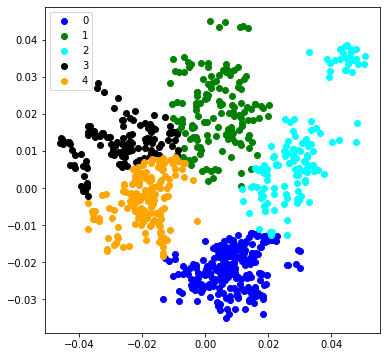

In [26]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=no_clusters)
gmm.fit(dataset_cleaned_reduced)
labels = gmm.predict(dataset_cleaned_reduced)
frame1 = pd.DataFrame(dataset_cleaned_reduced)
frame1['cluster'] = labels
frame1.columns = ['pca1', 'pca2', 'cluster']

plt.figure(figsize=(6, 6))

color=['blue','green','cyan', 'black', 'orange', 'red', 'yellow', 'pink']
for k in range(0, no_clusters):
    data = frame1[frame1["cluster"]==k]
    plt.scatter(data["pca1"],data["pca2"],c=color[k], label=k)
plt.legend()
plt.show()

In [40]:
dataset_o = dataset_original.copy()
classes = list(np.unique(dataset_o['class']))
for i, column in enumerate(classes):
    dataset_o.loc[dataset_o['class'] == column, 'class'] = i
dataset_o

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,7
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,7
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,7
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,7


In [42]:
for column in list(dataset_o.columns):
    dataset_o[column] = dataset_o[column].fillna(dataset_o[column].mean())

# TSNE

In [51]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(dataset_o)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1080 samples in 0.021s...
[t-SNE] Computed neighbors for 1080 samples in 0.258s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1080
[t-SNE] Computed conditional probabilities for sample 1080 / 1080
[t-SNE] Mean sigma: 1.156774
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.413742
[t-SNE] KL divergence after 2250 iterations: 0.197074


Од Numpy во Pandas DataFrame

In [52]:
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])

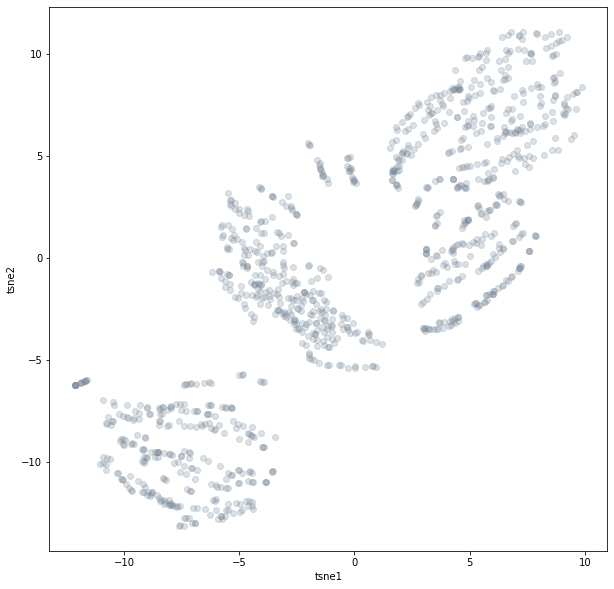

In [54]:
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Text(0, 0.5, 'Inertia')

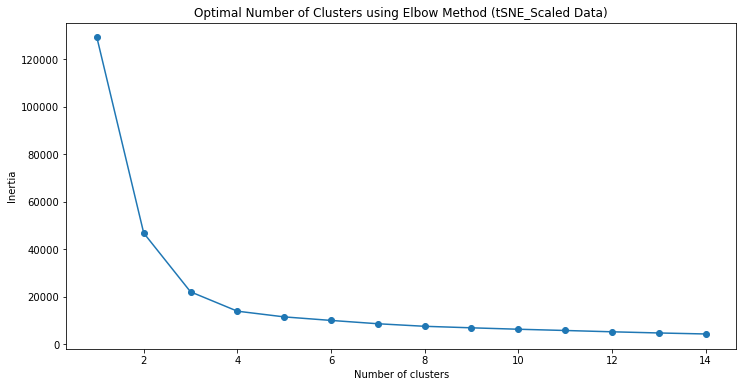

In [53]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Според elbow method добар избор за К е 4 за множество со 3 димензии.

In [60]:
df_tsne = pd.DataFrame(tsne_scale_results, columns = ['Column_A','Column_B','Column_C'])
df_tsne.head()

,Column_A,Column_B,Column_C
0,-9.435075,-8.666887,10.122313
1,-9.088684,-8.735257,10.016009
2,-9.076508,-8.810132,9.987473
3,-7.391610,-9.428945,9.744599
4,-7.150869,-9.554679,9.615849


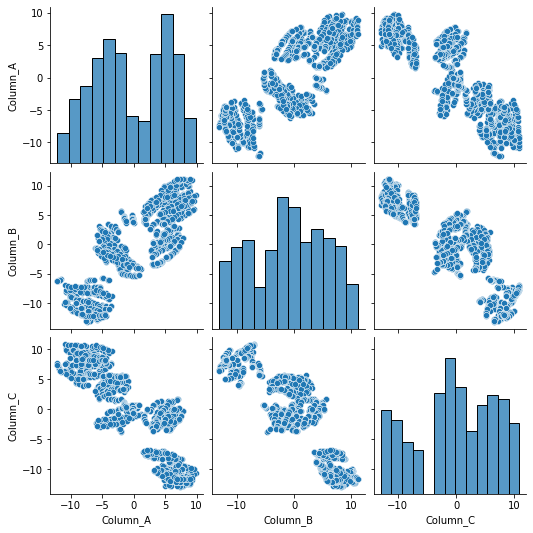

In [61]:
sns.pairplot(df_tsne)

In [69]:
tsne2d = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results2d = tsne2d.fit_transform(dataset_o)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1080 samples in 0.020s...
[t-SNE] Computed neighbors for 1080 samples in 0.265s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1080
[t-SNE] Computed conditional probabilities for sample 1080 / 1080
[t-SNE] Mean sigma: 1.156774
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.873753
[t-SNE] KL divergence after 2500 iterations: 0.291547


In [72]:
df_tsne2d = pd.DataFrame(tsne_scale_results2d, columns = ['Column_A','Column_B'])
df_tsne2d.head()

,Column_A,Column_B
0,-38.202213,-6.637970
1,-37.768768,-6.422832
2,-37.791527,-6.327788
3,-34.163769,-4.108490
4,-33.953232,-3.939033


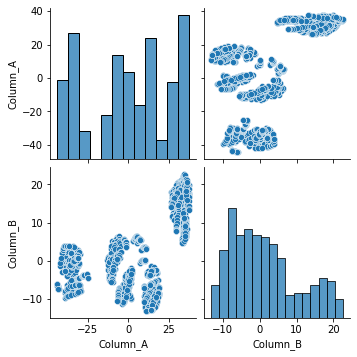

In [73]:
sns.pairplot(df_tsne2d)

# K-means со t-SNE

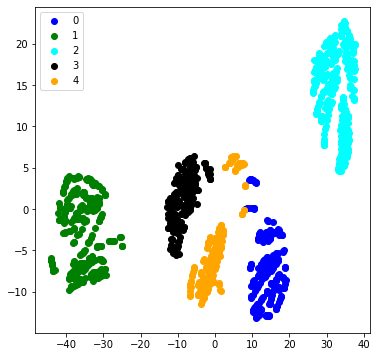

In [78]:
no_clusters = 5
kmeans = KMeans(n_clusters = no_clusters, random_state = 1)
kmeans.fit(df_tsne2d)

pred = kmeans.predict(df_tsne2d)
frame = df_tsne2d.copy()
# frame = pd.DataFrame(dataset_pca)
frame['cluster'] = pred
frame.columns = ['feature1', 'feature2', 'cluster']

plt.figure(figsize=(6, 6))
#plotting results
color=['blue','green','cyan', 'black', 'orange', 'red', 'yellow', 'pink']
for k in range(0, no_clusters):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["feature1"],data["feature2"],c=color[k], label=k)
plt.legend()
plt.show()

# Gaussian Mixture model

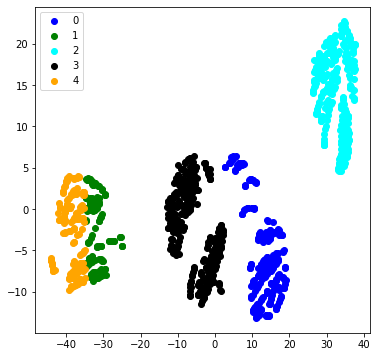

In [79]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=no_clusters)
gmm.fit(df_tsne2d)
labels = gmm.predict(df_tsne2d)
frame1 = pd.DataFrame(df_tsne2d)
frame1['cluster'] = labels
frame1.columns = ['feature1', 'feature2', 'cluster']

plt.figure(figsize=(6, 6))

color=['blue','green','cyan', 'black', 'orange', 'red', 'yellow', 'pink']
for k in range(0, no_clusters):
    data = frame1[frame1["cluster"]==k]
    plt.scatter(data["feature1"],data["feature2"],c=color[k], label=k)
plt.legend()
plt.show()

Визуализација со t-SNE на необработено множество со 8 кластери односно толку класи колку што имаме.

In [80]:
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(dataset_o)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1080 samples in 0.024s...
[t-SNE] Computed neighbors for 1080 samples in 0.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1080
[t-SNE] Computed conditional probabilities for sample 1080 / 1080
[t-SNE] Mean sigma: 0.849755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.857201
[t-SNE] KL divergence after 1000 iterations: 0.327944


In [81]:
from bioinfokit.visuz import cluster
cluster.tsneplot(score=tsne_em)

In [86]:
color_class = dataset_o['class'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

![title](tsne_2d.png)